# Tutorial: Building and Training a Fashion MNIST Classifier with TensorFlow and Keras

## Introduction

In this tutorial, we'll walk through the process of building and training a neural network classifier using TensorFlow and Keras to recognize fashion items from the Fashion MNIST dataset. The Fashion MNIST dataset consists of grayscale images of 10 types of clothing items, each represented by 28x28 pixels.

## Prerequisites

Before you begin, ensure you have the following installed:

- Python (3.x recommended)
- TensorFlow
- Numpy
- Matplotlib

You can install the necessary packages using `pip`:

```bash
pip install tensorflow numpy matplotlib
```

## Step 1: Import Libraries


In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data

In [2]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
num_pixels = 28 * 28
train_images = (train_images.reshape((60000, num_pixels)).astype(np.float32)) / 255.0
test_images = (test_images.reshape((10000, num_pixels)).astype(np.float32)) / 255.0


## Data Visualization

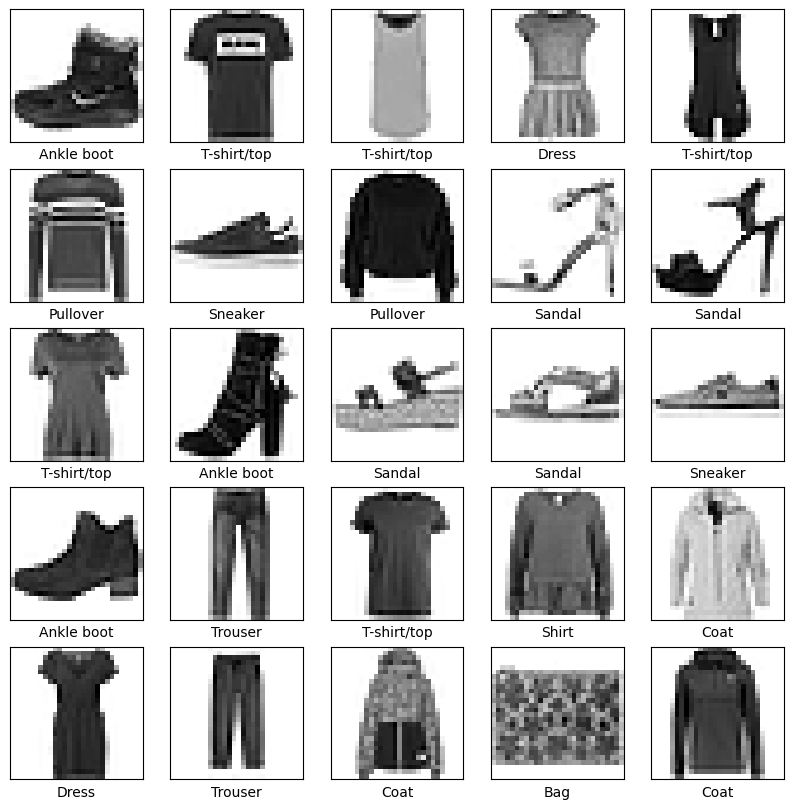

In [3]:
# Visualize some sample images before training
# Define fashion_labels
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(fashion_labels[train_labels[i]])
plt.show()

## Step 3: Define the Model

In [4]:
# Define the model using Functional API
nnet_inputs = Input(shape=(num_pixels,), name='images')

- Creates an input layer that expects input data with a shape of `num_pixels` (28x28 for Fashion MNIST).

In [5]:
z = Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.0001),
          bias_regularizer=regularizers.l2(0.0001), name='hidden')(nnet_inputs)
z = Dropout(0.3)(z)

- Adds a hidden layer with 100 neurons and ReLU activation. 
- Applies L2 regularization to the weights and biases.
- Adds a dropout layer with a rate of 0.3, helping prevent overfitting.

In [6]:
z = Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.0001),
          bias_regularizer=regularizers.l2(0.0001), name='output')(z)


- Adds an output layer with 10 neurons for classifying 10 fashion categories. 
- Applies softmax activation for probability distribution.
- Applies L2 regularization to the weights and biases.

In [7]:
mymodel = Model(inputs=nnet_inputs, outputs=z)


- Constructs the model using the defined layers. Input comes from `nnet_inputs`, output is `z`.

This code defines a neural network with an input layer, a hidden layer, a dropout layer, and an output layer. Regularization techniques are applied to prevent overfitting.

In [8]:
# Compile the model
mymodel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Summary

In [9]:
mymodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 784)]             0         
                                                                 
 hidden (Dense)              (None, 48)                37680     
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 output (Dense)              (None, 10)                490       
                                                                 
Total params: 38,170
Trainable params: 38,170
Non-trainable params: 0
_________________________________________________________________


## Step 4: Train the Model

- **Batch Size**:
  - The `batch_size` is the number of training examples used in one iteration of gradient descent. It controls how many samples the model processes at once. Smaller batch sizes consume less memory but may take longer to train.

- **Epoch**:
  - An epoch is one complete pass through the entire training dataset. During an epoch, the model sees each training example once. Training for multiple epochs allows the model to learn from the data multiple times.

- **Validation Split**:
  - `validation_split` is a portion of the training data that is set aside for validation. In this case, 10% of the training data is reserved for this purpose. The model's performance on this data is used to assess how well it generalizes to unseen examples. It's not used for training; it's purely for evaluation.

In [10]:
# Train the model
results = mymodel.fit(train_images, train_labels, batch_size=32, epochs=40, validation_split=0.1)


Epoch 1/40
1688/1688 [==============================] - 9s 4ms/step - loss: 0.6714 - accuracy: 0.7706 - val_loss: 0.4657 - val_accuracy: 0.8352
Epoch 2/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5037 - accuracy: 0.8276 - val_loss: 0.4238 - val_accuracy: 0.8535
Epoch 3/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4781 - accuracy: 0.8378 - val_loss: 0.4186 - val_accuracy: 0.8577
Epoch 4/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4644 - accuracy: 0.8448 - val_loss: 0.4089 - val_accuracy: 0.8642
Epoch 5/40
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4564 - accuracy: 0.8475 - val_loss: 0.3980 - val_accuracy: 0.8672
Epoch 6/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4452 - accuracy: 0.8524 - val_loss: 0.4033 - val_accuracy: 0.8642
Epoch 7/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4407 - accuracy: 0.8535 - val_loss: 0.3968 - val_accuracy:

## Step 5: Save and Load the Model (Optional)

In [11]:
# Save the model
mymodel.save('fashion_mnist_model-48-nodes.h5')

# Load the model
# loaded_model = load_model('fashion_mnist_model.h5')

## Step 6: Visualize Training Results

313/313 [==============================] - 1s 3ms/step


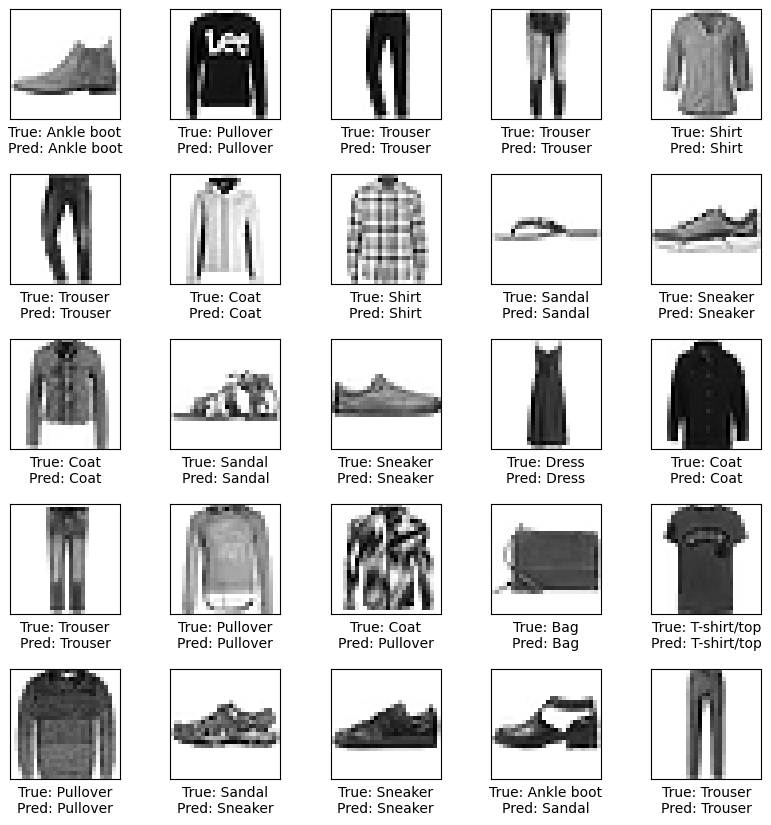

In [12]:
# Visualize some sample images after training
predictions = np.argmax(mymodel.predict(test_images), axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {fashion_labels[test_labels[i]]}\nPred: {fashion_labels[predictions[i]]}")

plt.subplots_adjust(hspace=0.5)  # Add spacing between rows
plt.show()

## Plot Confusion Matrix

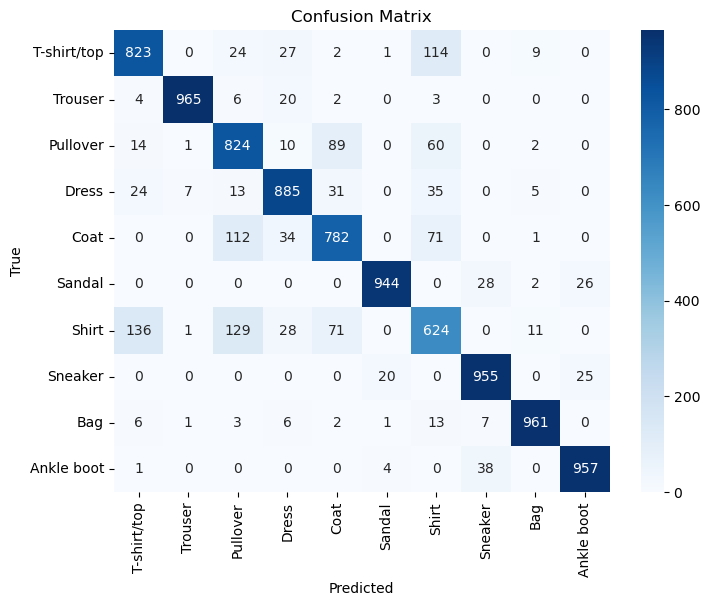

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Plot Confusion Matrix
conf_mat = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=fashion_labels, yticklabels=fashion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

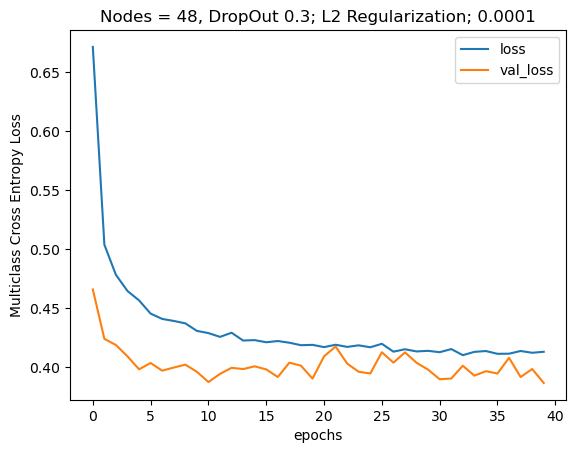

In [14]:
# Results and visualization
loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
epochs = np.arange(len(loss))

plt.figure()
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Multiclass Cross Entropy Loss')
plt.title('Nodes = 48, DropOut 0.3; L2 Regularization; 0.0001')
plt.legend()

## Conclusion

In this tutorial, we've built and trained a neural network classifier to recognize fashion items using TensorFlow and Keras. You've learned how to load and preprocess data, define a model using the Functional API, train the model, and visualize the training results. Additionally, we covered optional steps for saving and loading the model for future use.

Feel free to experiment with different model architectures, hyperparameters, and regularization techniques to improve performance. Happy coding!